In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [62]:
data = pd.read_csv('Shootings.csv')

In [63]:
data

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.183680,-77.607990,1
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,F,BLACK,NON HISPANIC,28,25-44,43.141723,-77.643147,2
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,WHITE,NON HISPANIC,49,45-Older,43.178448,-77.611200,3
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.168276,-77.613357,4
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,M,BLACK,NON HISPANIC,22,15-24,43.181775,-77.589725,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-77.603529,43.186527,25baf3637287b913da75ce7a82c02e76,20-248542,735 Norton St,2020/11/06 05:00:00+00,11,2020,Shooting,Yes,F,WHITE,HISPANIC,38,25-44,43.186527,-77.603529,193
193,-77.638011,43.177847,e7e65cbf4cbea4fb5a4b84213e4bff7c,20-247120,124 Maryland St,2020/11/05 05:00:00+00,11,2020,Shooting,No,M,WHITE,HISPANIC,45,45-Older,43.177847,-77.638011,194
194,-77.580387,43.163797,f9fc4e2caadd80ba41912e99a4198db3,20-247753,266 Garson Ave,2020/11/05 05:00:00+00,11,2020,Shooting,No,M,BLACK,NON HISPANIC,36,25-44,43.163797,-77.580387,195
195,-77.584300,43.177547,756cd79a8fb43560d781eb216e430d4d,20-246912,201 Fernwood Ave,2020/11/04 05:00:00+00,11,2020,Shooting,No,M,WHITE,NON HISPANIC,24,15-24,43.177547,-77.584300,196


In [64]:
#example cordinates
my_coords = [38.9719980,-76.9219820]

In [65]:
#zoom from coordinates (in degrees)
zoom_scale = 1

In [66]:
# Setup the bounding box for the zoom and bounds of the map
bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

In [67]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [68]:
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

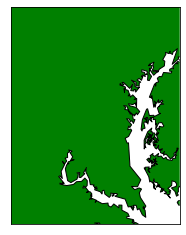

In [69]:
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='blue')

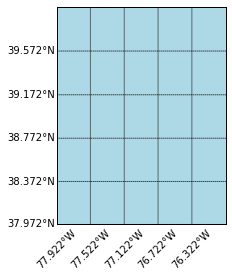

In [70]:
# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='lightblue')

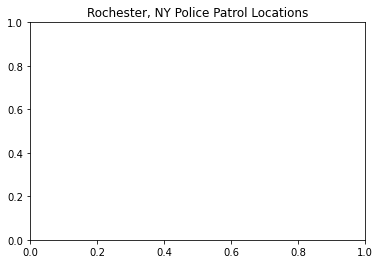

In [71]:
# build and plot coordinates onto map
x,y = m(my_coords[1],my_coords[0])
plt.title("Rochester, NY Police Patrol Locations")
plt.savefig('Patrolling_area.png', format='png', dpi=500)